In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('archive/twitter_training.csv')
df.info()

In [ ]:
df.columns = ['id', 'entity', 'sentiment', 'tweet_text']
df.head(10)


### Cleaning the dataframe:
1. drop duplicates and na values
2. create a function that takes the tweet-text, removes hyperlinks, special characters, etc,

In [ ]:
df = df.drop_duplicates(subset=['tweet_text'])
df = df.dropna(subset=['tweet_text'])
df.info()

In [ ]:
import re

def clean_text(text):
    text = re.sub(r"http\S+","", text) #remove urls
    text = re.sub(r"[^A-Za-z\s]", "", text) # removing numbers, special characters
    return text.strip()

df['tweet_text'] = df['tweet_text'].apply(clean_text)

#### Sentiment Analysis Function
1. create a TextBlob object, and pass tweet_text in, to get the sentiment polarity
2. assign Positive/Neutral/Negative; and create a new column
3. in the new column, add the analyzed sentiment

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity # returns the score (-1, +1)
# TextBlob(text).sentiment gives two values: polarity(-1,+1) and subjectivity(0,1); I want the polarity

df['sentiment_score'] = df['tweet_text'].apply(get_sentiment)

# categorize the score as +/0/-
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

In [ ]:
# df.head(5)
print(df.columns)
# df = df.loc[:, ~df.columns.duplicated()]
# df = df.drop(columns=['sentiment-category'])


In [ ]:
# print(df.columns)
df.head(5)

## Visualization using Python Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

##### Bar Chart

In [ ]:
sentiment_count = df['sentiment_category'].value_counts()
print(sentiment_count)
type(sentiment_count)

C:\Users\tejes\AppData\Local\Temp\ipykernel_6056\1045528439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y= sentiment_count.values, palette='viridis')


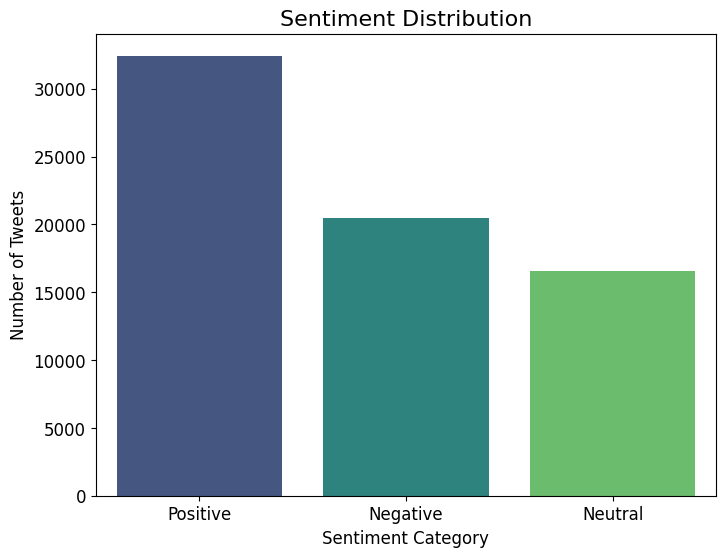

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_count.index, y= sentiment_count.values, palette='viridis')
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel('Sentiment Category', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.show()

##### Histogram

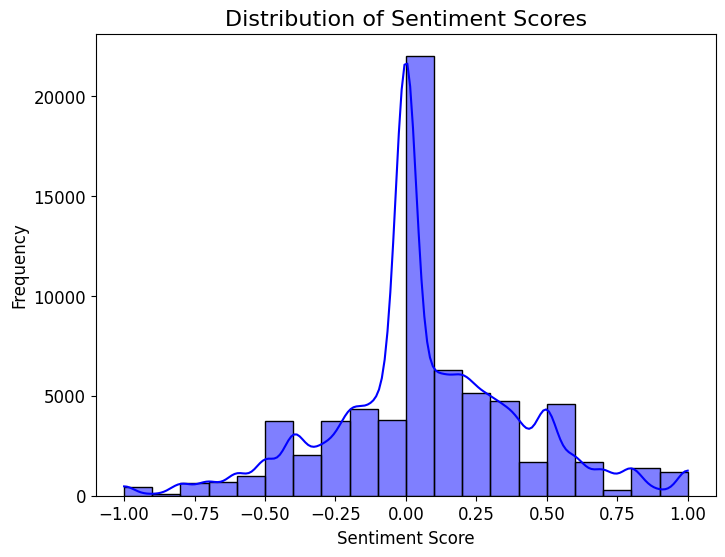

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True,bins=20,color='blue')
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Sentiment by Entity (Game)

In [ ]:
entity_sentiment = df.groupby('entity')['sentiment_score'].mean().sort_values()
type(entity_sentiment)
# print(entity_sentiment)

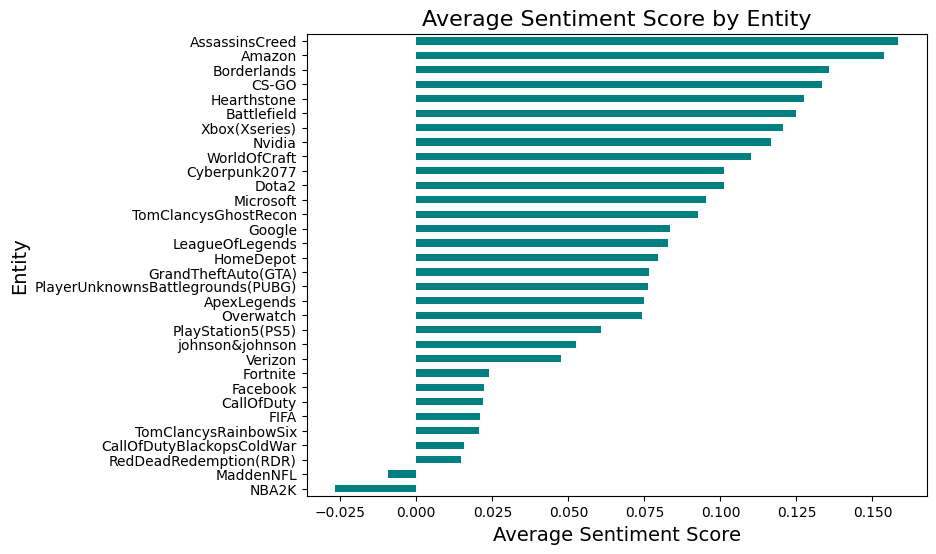

In [28]:
plt.figure(figsize=(8,6))
entity_sentiment.plot(kind='barh', color='teal')
plt.title('Average Sentiment Score by Entity',fontsize=16)
plt.title('Average Sentiment Score by Entity', fontsize=16)
plt.xlabel('Average Sentiment Score', fontsize=14)
plt.ylabel('Entity', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### WordCloud of Various Tweets

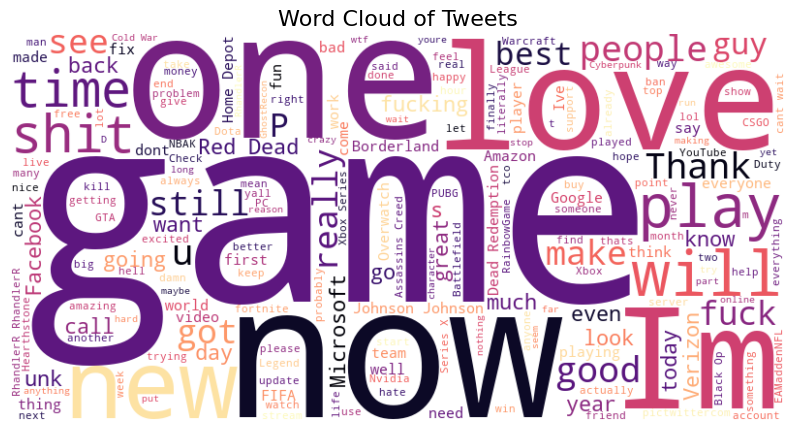

In [27]:
all_text = " ".join(df['tweet_text'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets', fontsize=16)
plt.show()